# Step 1 : Importing Essential Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

# Step 2 : Making Dictionary of images and labels

In [2]:
path='/kaggle/input/skin-disease-detection-final-dataset/dataset-final/skin-disease-dataset/'
dirs = os.listdir(path)
print( len(dirs))

9012


# Labels:
* 0 - Keratosis (Actinic)
* 1 - Keratosis (Benign)
* 2 - Carcinoma
* 3 - Dermatofibroma
* 4 - Melanoma
* 5 - Skin Lesion
* 6 - Melanocytic Nevus


In [3]:
dict={
    'M':'Melanoma',
    'CA':'Carcinoma', 
    'DT':'Dermatofibroma',
    'L':'Skin Lesion',
    'KA':'Keratosis (Actinic)',
    'MN':'Melanocytic Nevus',
    'KB':'Keratosis (Benign)'
}

In [4]:
df=pd.read_csv('/kaggle/input/skin-disease-detection-final-dataset/dataset-final/main.csv')
df

,Image Path,KA,KB,CA,DT,M,L,MN
0,KA_0001.jpg,1,0,0,0,0,0,0
1,KA_0002.jpg,1,0,0,0,0,0,0
2,KA_0003.jpg,1,0,0,0,0,0,0
3,KA_0004.jpg,1,0,0,0,0,0,0
4,KA_0005.jpg,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
9007,MN_1564.jpg,0,0,0,0,0,0,1
9008,MN_1565.jpg,0,0,0,0,0,0,1
9009,MN_1566.jpg,0,0,0,0,0,0,1
9010,MN_1567.jpg,0,0,0,0,0,0,1


In [5]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("/kaggle/input/skin-disease-detection-final-dataset/dataset-final/main.csv")

# Drop the unwanted columns
columns=["KA", "KB", "M", "L", "MN", "CA", "DT"]

# Loop through the remaining columns and replace the values with the column name
for col in df.columns[1:]:
    df.loc[df[col] == 1, "cell_type"] = col
    
# df = df.drop(columns=columns)

# First we will rename the Image Path to Image as it only contains the image name
df = df.rename(columns={"Image Path": "image_id"})

# Create a new column 'path' that contains the name of the image from df['image'] and add the path to that image
df['path'] = path + df['image_id']

digit_to_label = {2: "KA", 3: "KB", 0: "M", 1: "L", 5: "MN", 4: "CA", 6: "DT"}

df['cell_type_idx'] = df['cell_type'].map(dict.get)
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes
df = df.drop(columns=['cell_type','image_id'])
df

,KA,KB,CA,DT,M,L,MN,path,cell_type_idx
0,1,0,0,0,0,0,0,/kaggle/input/skin-disease-detection-final-dat...,2
1,1,0,0,0,0,0,0,/kaggle/input/skin-disease-detection-final-dat...,2
2,1,0,0,0,0,0,0,/kaggle/input/skin-disease-detection-final-dat...,2
3,1,0,0,0,0,0,0,/kaggle/input/skin-disease-detection-final-dat...,2
4,1,0,0,0,0,0,0,/kaggle/input/skin-disease-detection-final-dat...,2
...,...,...,...,...,...,...,...,...,...
9007,0,0,0,0,0,0,1,/kaggle/input/skin-disease-detection-final-dat...,6
9008,0,0,0,0,0,0,1,/kaggle/input/skin-disease-detection-final-dat...,6
9009,0,0,0,0,0,0,1,/kaggle/input/skin-disease-detection-final-dat...,6
9010,0,0,0,0,0,0,1,/kaggle/input/skin-disease-detection-final-dat...,6


# Step 4 : Data Cleaning

In [6]:
df.isnull().sum()

KA               0
KB               0
CA               0
DT               0
M                0
L                0
MN               0
path             0
cell_type_idx    0
dtype: int64

In [7]:
print(df.dtypes)

KA                int64
KB                int64
CA                int64
DT                int64
M                 int64
L                 int64
MN                int64
path             object
cell_type_idx      int8
dtype: object


# Step 5 : EDA

In this we will explore different features of the dataset , their distrubtions and actual counts

<AxesSubplot:>

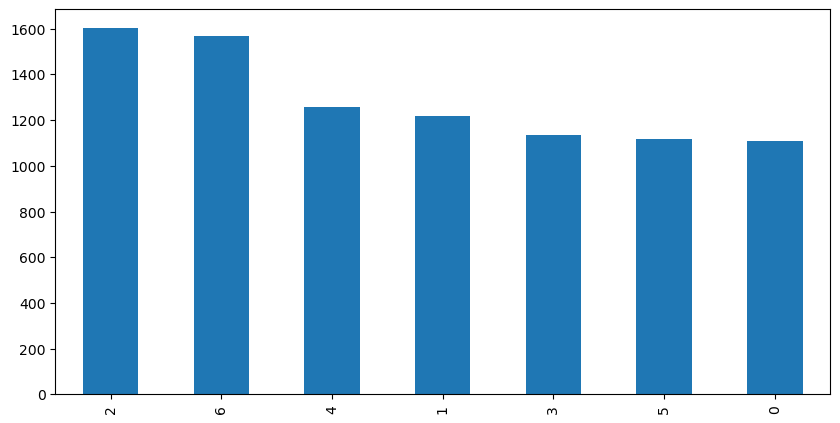

In [8]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
df['cell_type_idx'].value_counts().plot(kind='bar', ax=ax1)

# Step 6: Loading and resizing of images

In [9]:
# Load the image arrays and add them to the DataFrame
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))
df

,KA,KB,CA,DT,M,L,MN,path,cell_type_idx,image
0,1,0,0,0,0,0,0,/kaggle/input/skin-disease-detection-final-dat...,2,"[[[162, 138, 136], [162, 135, 136], [158, 134,..."
1,1,0,0,0,0,0,0,/kaggle/input/skin-disease-detection-final-dat...,2,"[[[191, 99, 125], [187, 93, 122], [186, 91, 11..."
2,1,0,0,0,0,0,0,/kaggle/input/skin-disease-detection-final-dat...,2,"[[[180, 151, 155], [181, 150, 155], [182, 151,..."
3,1,0,0,0,0,0,0,/kaggle/input/skin-disease-detection-final-dat...,2,"[[[211, 175, 179], [213, 179, 180], [211, 172,..."
4,1,0,0,0,0,0,0,/kaggle/input/skin-disease-detection-final-dat...,2,"[[[193, 151, 155], [195, 154, 160], [195, 164,..."
...,...,...,...,...,...,...,...,...,...,...
9007,0,0,0,0,0,0,1,/kaggle/input/skin-disease-detection-final-dat...,6,"[[[214, 126, 153], [216, 128, 156], [221, 134,..."
9008,0,0,0,0,0,0,1,/kaggle/input/skin-disease-detection-final-dat...,6,"[[[233, 116, 121], [234, 117, 122], [234, 115,..."
9009,0,0,0,0,0,0,1,/kaggle/input/skin-disease-detection-final-dat...,6,"[[[228, 172, 191], [230, 177, 192], [229, 176,..."
9010,0,0,0,0,0,0,1,/kaggle/input/skin-disease-detection-final-dat...,6,"[[[254, 193, 203], [254, 193, 202], [254, 193,..."


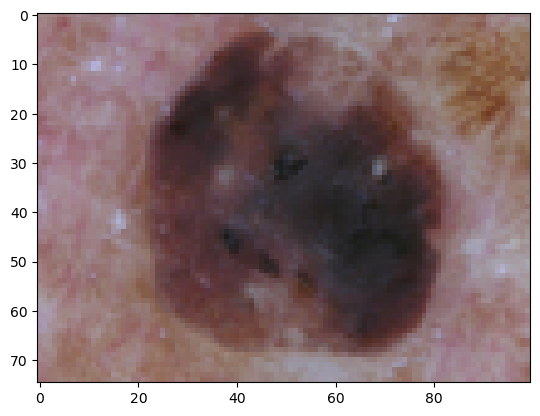

In [10]:
plt.imshow(df['image'][0])

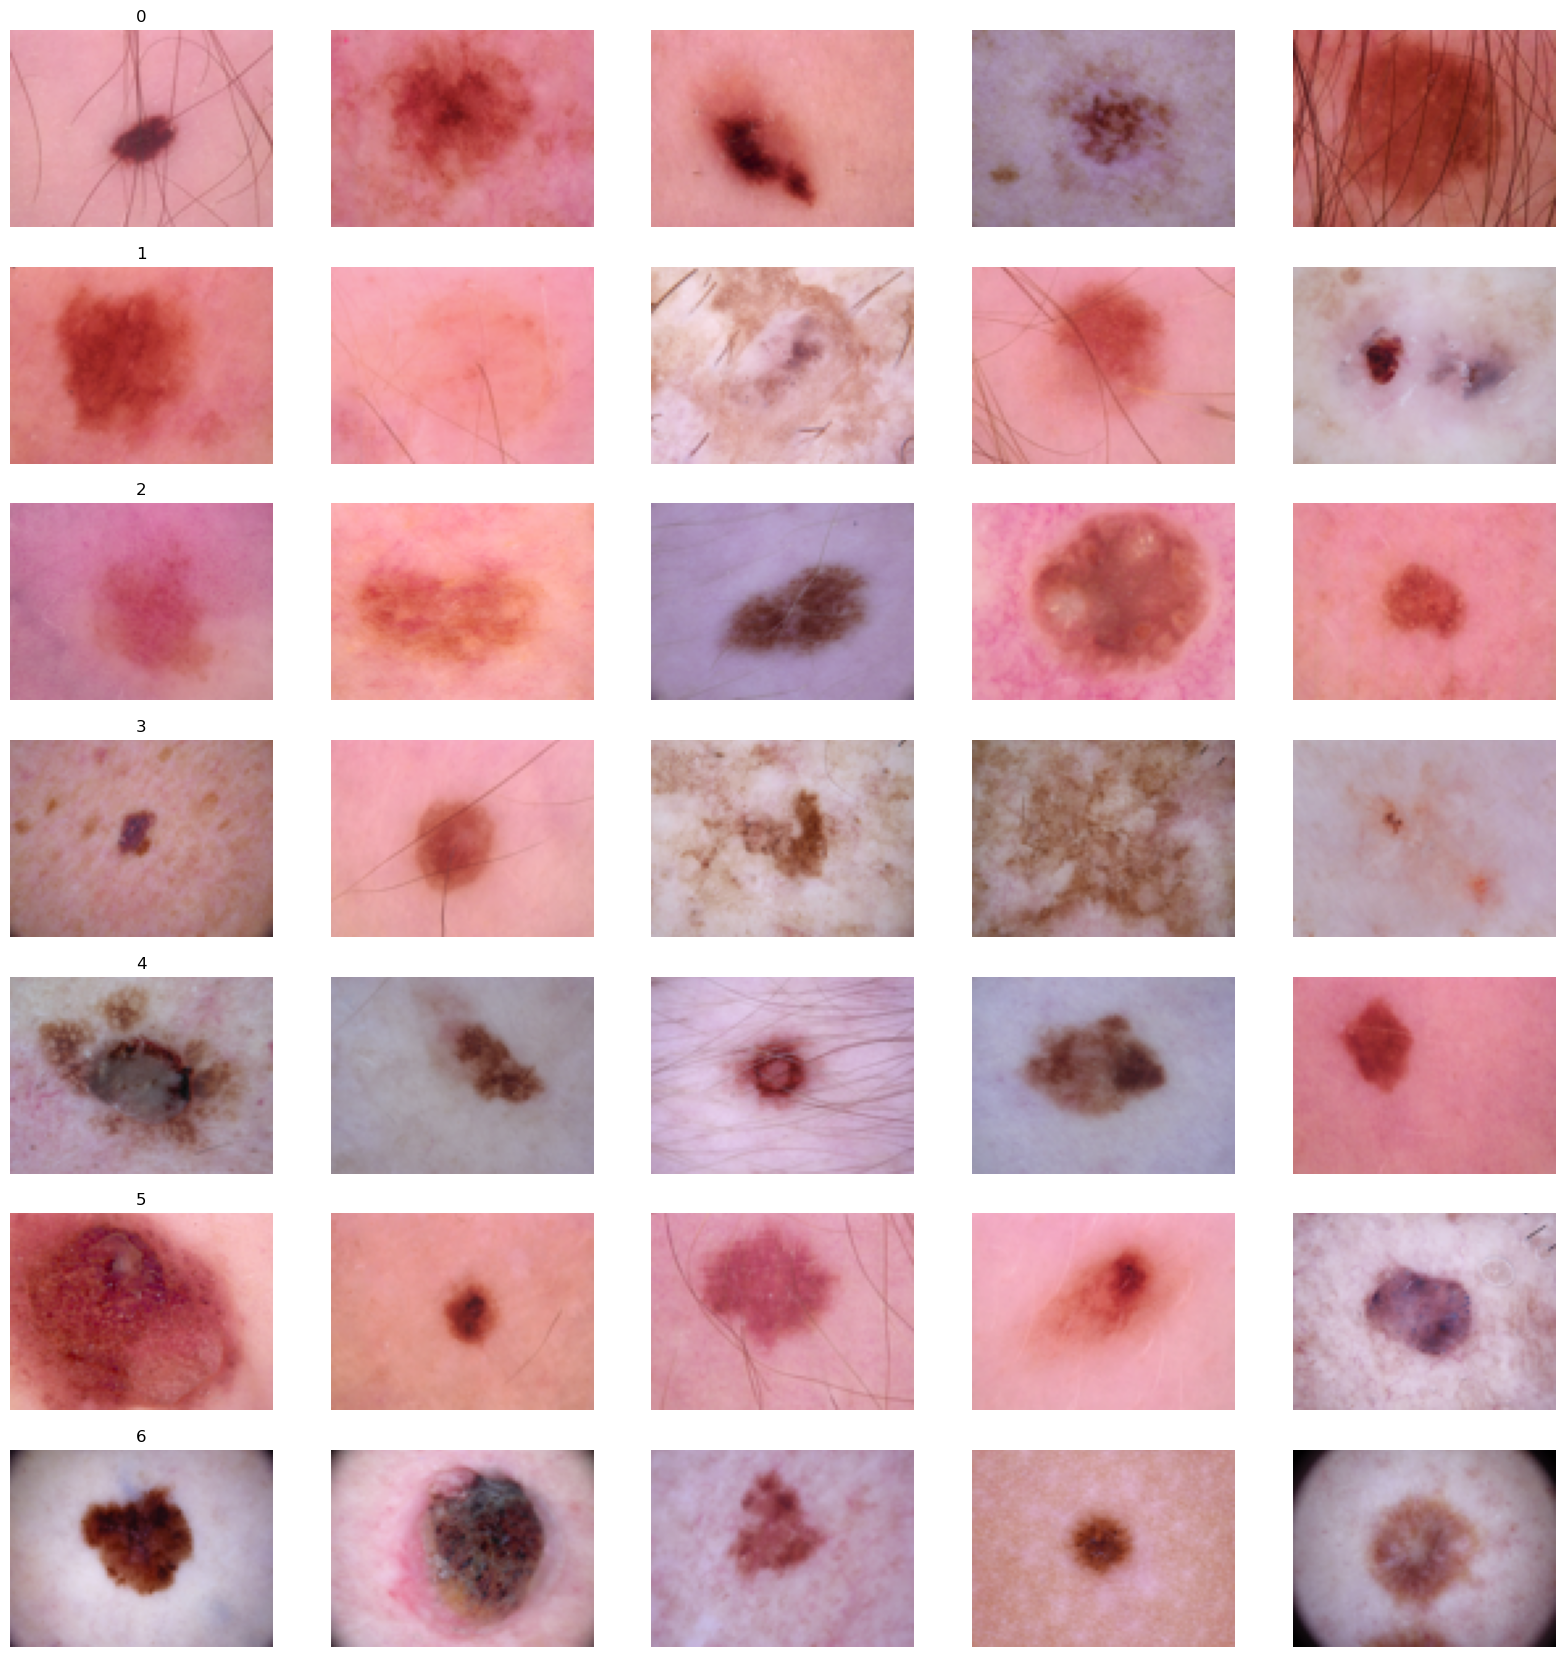

In [11]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, df.sort_values(['cell_type_idx']).groupby('cell_type_idx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [12]:
df['image'].map(lambda x: x.shape).value_counts()

(75, 100, 3)    9012
Name: image, dtype: int64

In [13]:
features=df.drop(columns=['cell_type_idx','path'],axis=1)
target=df['cell_type_idx']

# Step 7 : Train Test Split

In [14]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.20,random_state=1234)

# Step 8 : Normalization

In [15]:
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

# Step 9 : Label Encoding

In [16]:
# Perform one-hot encoding on the labels
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)

# Step 10 : Splitting training and validation split

In [17]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)

In [18]:
# Reshape image in 3 dimensions (height = 75px, width = 100px , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(75, 100, 3))
x_test = x_test.reshape(x_test.shape[0], *(75, 100, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(75, 100, 3))

# Step 11: Model Building

In [19]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
input_shape = (75,100, 3)
num_classes = 7

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 100, 32)       896       
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 100, 32)       9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 50, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 37, 50, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 50, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 50, 64)        36928     
                                                        

# Step 12: Setting Optimizer and Annealer

In [20]:
# Define the optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [21]:
# With data augmentation to prevent overfitting 

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

# Step 13: Fitting the model

In [24]:
# Fit the model
epochs = 50
batch_size = 32
history=model.fit(x=x_train, y=y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_validate,y_validate))

Epoch 1/50
203/203 [==============================] - 5s 25ms/step - loss: 0.5688 - accuracy: 0.7922 - val_loss: 3.8756 - val_accuracy: 0.2732
Epoch 2/50
203/203 [==============================] - 4s 22ms/step - loss: 0.5639 - accuracy: 0.7915 - val_loss: 3.8328 - val_accuracy: 0.2940
Epoch 3/50
203/203 [==============================] - 5s 22ms/step - loss: 0.5483 - accuracy: 0.7978 - val_loss: 4.0510 - val_accuracy: 0.2968
Epoch 4/50
203/203 [==============================] - 4s 22ms/step - loss: 0.5326 - accuracy: 0.7979 - val_loss: 3.6311 - val_accuracy: 0.2996
Epoch 5/50
203/203 [==============================] - 4s 22ms/step - loss: 0.5350 - accuracy: 0.7995 - val_loss: 3.9677 - val_accuracy: 0.3037
Epoch 6/50
203/203 [==============================] - 4s 22ms/step - loss: 0.5112 - accuracy: 0.8064 - val_loss: 4.0241 - val_accuracy: 0.3121
Epoch 7/50
203/203 [==============================] - 4s 22ms/step - loss: 0.5072 - accuracy: 0.8113 - val_loss: 4.2199 - val_accuracy: 0.3107

# Step 14: Model Evaluation

In [28]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=1)
print("Train: accuracy = %f  ;  loss = %f" % (accuracy, loss))

203/203 [==============================] - 1s 7ms/step - loss: 0.2425 - accuracy: 0.9243
Train: accuracy = 0.924322  ;  loss = 0.242532


In [ ]:
model.save("model.h5")